## **Tumor Classification with RNA-Seq Data Set**
This dataset is from the UCI Machine Learning repository. This collection of data is part of the RNA-Seq (HiSeq) PANCAN data set, it is a random extraction of gene expressions of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD.

The datast is divided in data.csv and labels.csv. We need both to correctly analyse the dataset.

Our goal is to preprocess the large dataset using 3 different dimensionality reduction models: PCA, TSNE, UMAP and then apply different classification models on the reduced data.

Dataset:https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq

Contributors: https://github.com/EmiljaB https://github.com/kleagjoshi https://github.com/sindiziu1

In [ ]:
%pip install 'tpot'
%pip install 'lmfit'
%pip install umap-learn
%pip install 'warnings'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lmfit import Model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import umap.umap_ as umap
from tpot import TPOTClassifier
import warnings

warnings.filterwarnings('ignore')
pl.style.use('seaborn')
pl.rc('font',family='DejaVu Sans')

# Read in data

In [ ]:
data = pd.read_csv("data.csv")
labels = pd.read_csv("labels.csv")
data

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [ ]:
labels

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


Rename data frames, drop sample names and null values

In [ ]:
data = data.iloc[:,1:]
data = data.dropna()
print(data)
Y = labels.Class

     gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0       0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1       0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2       0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3       0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4       0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   
..      ...       ...       ...       ...        ...     ...       ...   
796     0.0  1.865642  2.718197  7.350099  10.006003     0.0  6.764792   
797     0.0  3.942955  4.453807  6.346597  10.056868     0.0  7.320331   
798     0.0  3.249582  3.707492  8.185901   9.504082     0.0  7.536589   
799     0.0  2.590339  2.787976  7.318624   9.987136     0.0  9.213464   
800     0.0  2.325242  3.805932  6.530246   9.560367     0.0  7.957027   

       gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
0    0.591871     0.0     0.0  ...   

# Dimensionality Reduction

**Principle Component Analysis**


Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space by identifying the principal components, which are linear combinations of the original features. These components capture the maximum variance in the data. PCA simplifies the dataset while preserving as much variance as possible, making it useful for compressing information and identifying dominant patterns.

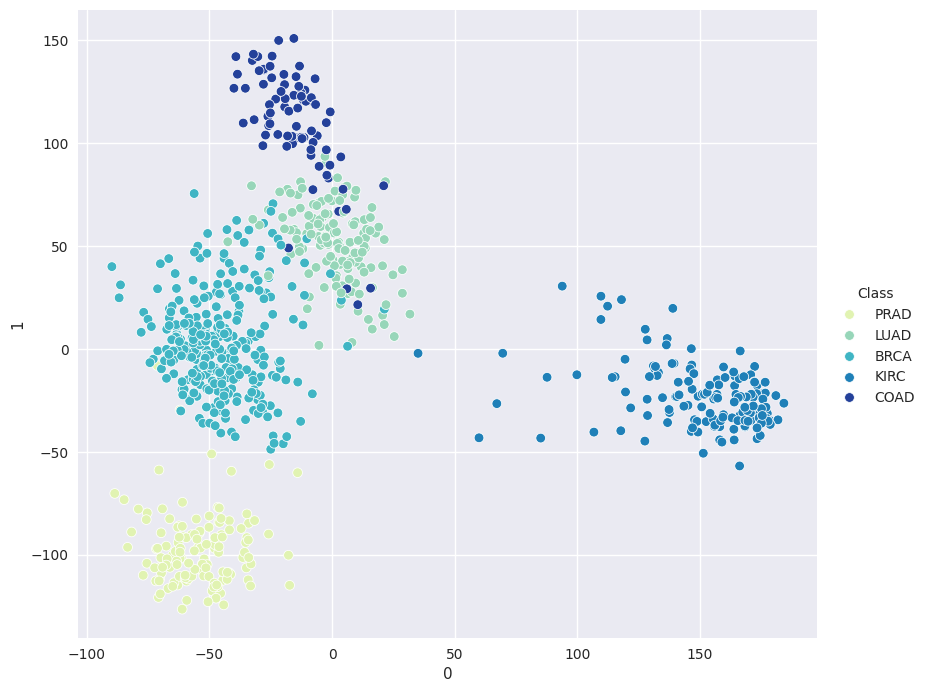

In [ ]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(data)
X_pca = pd.DataFrame(data = principalComponents)
X_pca = pd.concat([X_pca.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_pca, hue="Class",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

**T-SNE reduction**

This code performs t-Distributed Stochastic Neighbor Embedding (t-SNE) on a dataset, reduces its dimensionality to 2 components, and then creates a pair plot to visualize the relationships between the two t-SNE components.


t-SNE works by measuring pairwise similarities between data points in the high-dimensional space using Gaussian distributions. It then constructs a low-dimensional map, initializing points randomly, and optimizes their positions to minimize the mismatch between pairwise similarities in the high-dimensional and low-dimensional spaces. This process effectively retains local structures, making it valuable for visualizing clusters and patterns in complex datasets.

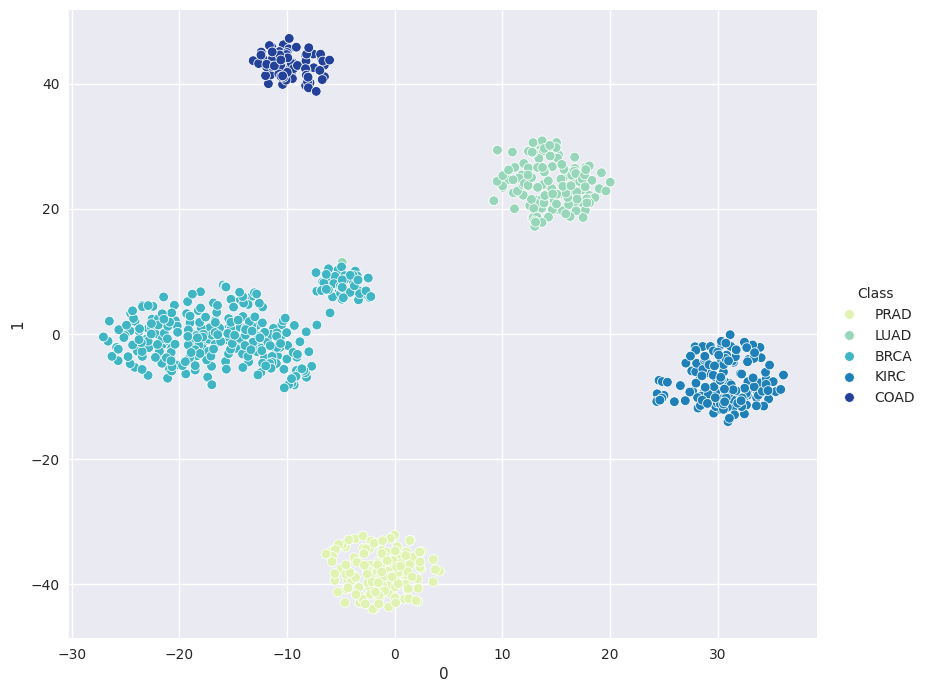

In [ ]:
X_tsne = TSNE(n_components=2).fit_transform(data)
X_tsne = pd.DataFrame(data = X_tsne)
X_tsne = pd.concat([X_tsne.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_tsne, hue="Class",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

**UMAP reduction**


UMAP constructs a high-dimensional graph based on data similarities, then optimizes a lower-dimensional representation to preserve both local and global structures. Unlike t-SNE, UMAP is computationally efficient and scales well to large datasets, offering an effective alternative for dimensionality reduction and visualization.

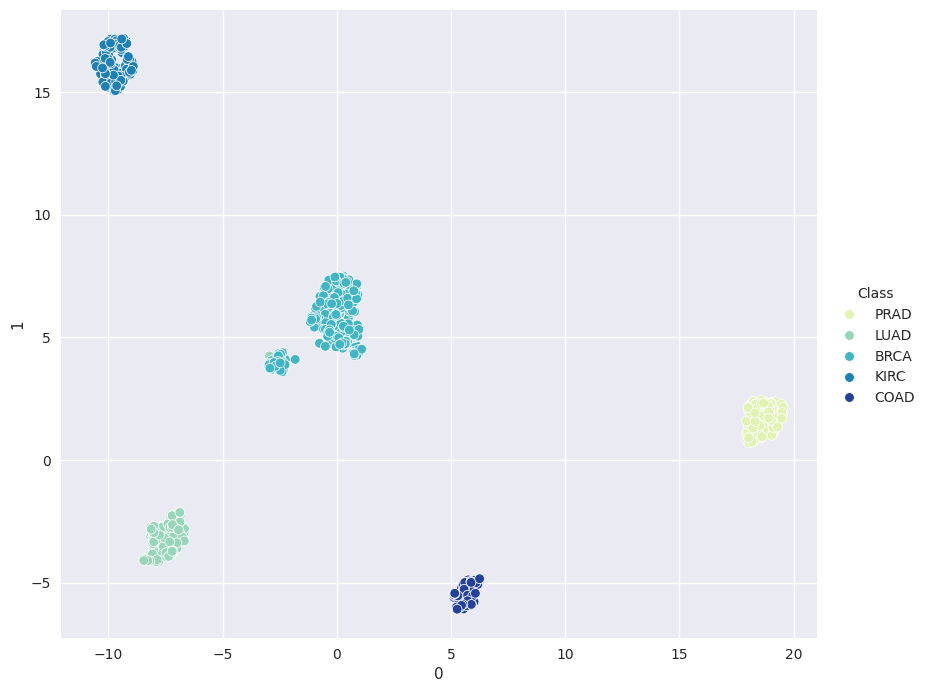

In [ ]:
X_umap = umap.UMAP().fit_transform(data)
X_umap = pd.DataFrame(data=X_umap)
X_umap = pd.concat([X_umap.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_umap, hue="Class",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

## **3. Train classification model**

From the plots we can see that UMAP performed better in reducing the data.
So, we use UMAP-transformed data and separate into train and test set

In [ ]:
X = X_umap.drop(['Class'],axis=1)
Y = X_umap['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

Train linear SVM model

In [ ]:
lsvc_model = SVC(kernel = 'linear', random_state = 10)
lsvc_model.fit(X_train, Y_train)
Y_pred = lsvc_model.predict(X_test)

print('train score: '+str(lsvc_model.score(X_train,Y_train)))
print('test score:  '+str(lsvc_model.score(X_test,Y_test)))

print(confusion_matrix(Y_pred, Y_test))
print(classification_report(Y_pred, Y_test))

train score: 0.9983333333333333
test score:  1.0
[[81  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 33  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 33]]
              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        81
        COAD       1.00      1.00      1.00        18
        KIRC       1.00      1.00      1.00        33
        LUAD       1.00      1.00      1.00        36
        PRAD       1.00      1.00      1.00        33

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
lsvc_model = GaussianNB()
lsvc_model.fit(X_train, Y_train)
Y_pred = lsvc_model.predict(X_test)

print('train score: '+str(lsvc_model.score(X_train,Y_train)))
print('test score:  '+str(lsvc_model.score(X_test,Y_test)))

print(confusion_matrix(Y_pred, Y_test))
print(classification_report(Y_pred, Y_test))

train score: 0.9983333333333333
test score:  1.0
[[81  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 33  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 33]]
              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        81
        COAD       1.00      1.00      1.00        18
        KIRC       1.00      1.00      1.00        33
        LUAD       1.00      1.00      1.00        36
        PRAD       1.00      1.00      1.00        33

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
svc_model = LogisticRegression()
lsvc_model.fit(X_train, Y_train)

Y_pred = lsvc_model.predict(X_test)

print('train score: '+str(lsvc_model.score(X_train,Y_train)))
print('test score:  '+str(lsvc_model.score(X_test,Y_test)))

print(confusion_matrix(Y_pred, Y_test))
print(classification_report(Y_pred, Y_test))

train score: 0.9983333333333333
test score:  1.0
[[81  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 33  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 33]]
              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        81
        COAD       1.00      1.00      1.00        18
        KIRC       1.00      1.00      1.00        33
        LUAD       1.00      1.00      1.00        36
        PRAD       1.00      1.00      1.00        33

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
svc_model = KNeighborsClassifier(n_neighbors=5)
lsvc_model.fit(X_train, Y_train)

Y_pred = lsvc_model.predict(X_test)

print('train score: '+str(lsvc_model.score(X_train,Y_train)))
print('test score:  '+str(lsvc_model.score(X_test,Y_test)))

print(confusion_matrix(Y_pred, Y_test))
print(classification_report(Y_pred, Y_test))

train score: 0.9983333333333333
test score:  1.0
[[81  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 33  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 33]]
              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        81
        COAD       1.00      1.00      1.00        18
        KIRC       1.00      1.00      1.00        33
        LUAD       1.00      1.00      1.00        36
        PRAD       1.00      1.00      1.00        33

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
svc_model = DecisionTreeClassifier()
lsvc_model.fit(X_train, Y_train)

Y_pred = lsvc_model.predict(X_test)

print('train score: '+str(lsvc_model.score(X_train,Y_train)))
print('test score:  '+str(lsvc_model.score(X_test,Y_test)))

print(confusion_matrix(Y_pred, Y_test))
print(classification_report(Y_pred, Y_test))

train score: 0.9983333333333333
test score:  1.0
[[81  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 33  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 33]]
              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        81
        COAD       1.00      1.00      1.00        18
        KIRC       1.00      1.00      1.00        33
        LUAD       1.00      1.00      1.00        36
        PRAD       1.00      1.00      1.00        33

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



## **4. Conclusion**

UMAP and T-SNE do an excellent job of separating the tumor types. Different classificaton models were able to predict the test data using UMAP-transformed data.The results for all models, as seen by the classification reports, are 100% accurate, all of them showing the exact same results. Here, over 20,000 genes have been reduced to two dimensions.

